Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


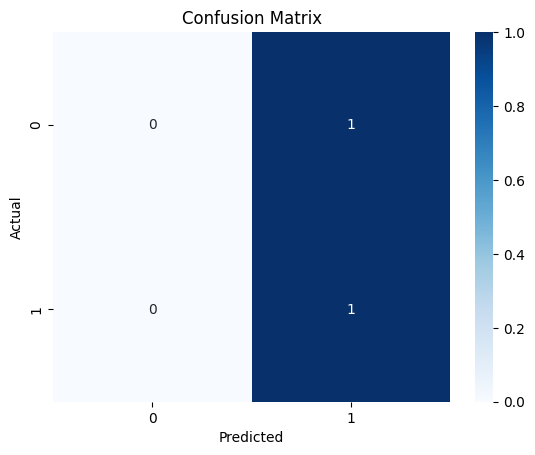

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset (Example dataset)
data = {
    'review': [
        "I love this product! It works great.",
        "Terrible experience, it broke after one day.",
        "Absolutely fantastic! Highly recommend it.",
        "Worst purchase ever. Waste of money.",
        "It does the job well, satisfied.",
        "Not worth the price.",
        "Exceeded my expectations!",
        "I hate it. Very bad quality.",
        "Great value for money.",
        "Disappointed and frustrated."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)

# 2. Preprocessing
X = df['review']
y = df['sentiment']

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

